# Supervised ML for anomaly detection in IOT to enahnce network security
## Part 2 - DATA PROCESSING

The IoT-23 dataset is a collection of network traffic from Internet of Things (IoT) devices. It includes 20 malware captures executed in IoT devices, and 3 hotspot captures for benign IoT devices traffic12. The 3 hotspot captures are not being included in the data cleaning because this feature was not considered relevant for the specific analysis being performed.

In this notebook, we load the cleaned dataset file and process it into an acceptable format to ML algorithms.

> **INPUT:** the cleaned dataset csv file as resulted from the previous cleaning phase.<br>
> **OUTPUT:** a processed (final version) of the dataset as a csv file.  

***

### 1. INITIALIZATION

In [1]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# Set display options
pd.set_option('display.max_columns', None)

### 2. LOADING CLEANED DATASET

In [3]:
# Read csv
df = pd.read_csv('../CSV-data/interim/iot23_combined.csv', index_col=0, low_memory=False)

In [4]:
# Check dataset shape
df.shape

(1444706, 12)

In [5]:
# Check dataset
df

,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed_label
0,udp,0.004751,48.0,48.0,SF,0,1,76,1,76,Benign,Benign
1,tcp,108.421563,2376.0,96.0,OTH,0,5,332,2,200,Benign,Benign
2,tcp,0.001244,21.0,0.0,S0,0,3,189,0,0,Benign,Benign
3,tcp,0.000738,21.0,0.0,S0,0,3,189,0,0,Benign,Benign
4,udp,0.000000,0.0,0.0,S0,0,1,58,0,0,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...
1444701,tcp,0.000000,0.0,0.0,S0,0,1,60,0,0,Malicious,PartOfAHorizontalPortScan
1444702,tcp,2.999363,0.0,0.0,S0,0,3,180,0,0,Malicious,PartOfAHorizontalPortScan
1444703,tcp,0.000000,0.0,0.0,S0,0,1,60,0,0,Malicious,PartOfAHorizontalPortScan
1444704,tcp,2.997674,0.0,0.0,S0,0,3,180,0,0,Malicious,PartOfAHorizontalPortScan


In [6]:
# Check dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444706 entries, 0 to 1444705
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   proto           1444706 non-null  object 
 1   duration        1444706 non-null  float64
 2   orig_bytes      1444706 non-null  float64
 3   resp_bytes      1444706 non-null  float64
 4   conn_state      1444706 non-null  object 
 5   missed_bytes    1444706 non-null  int64  
 6   orig_pkts       1444706 non-null  int64  
 7   orig_ip_bytes   1444706 non-null  int64  
 8   resp_pkts       1444706 non-null  int64  
 9   resp_ip_bytes   1444706 non-null  int64  
 10  label           1444706 non-null  object 
 11  detailed_label  1444706 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 143.3+ MB


### 3. DATA PREPROCESSING

In [7]:
# Check null values in the target attribute
df["label"].isna().sum()

0

In [8]:
# Check values distribution
df["label"].value_counts()

label
Malicious    1246872
Benign        197834
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

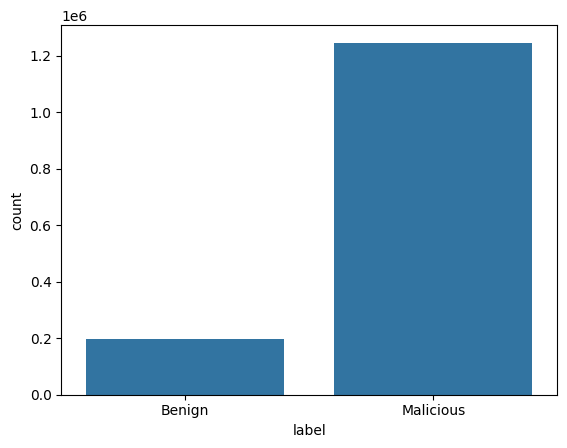

In [9]:
# Plot target attribute on a count plot
sns.countplot(data=df, x="label")

- As we can see from these statistics, the target attribute is highly imbalanced.
- We will maintain the original distribution for now until we explore the models' performance. 

In [10]:
# Check null values in the target attribute for each label in detailed
df["detailed_label"].isna().sum()

0

In [11]:
# Check values distribution
df["detailed_label"].value_counts()

detailed_label
PartOfAHorizontalPortScan     825931
Okiru                         262687
Benign                        197834
DDoS                          138775
C&C                            15107
Attack                          3915
C&C-HeartBeat                    351
C&C-FileDownload                  47
C&C-Torii                         30
FileDownload                      17
C&C-HeartBeat-FileDownload        11
C&C-Mirai                          1
Name: count, dtype: int64

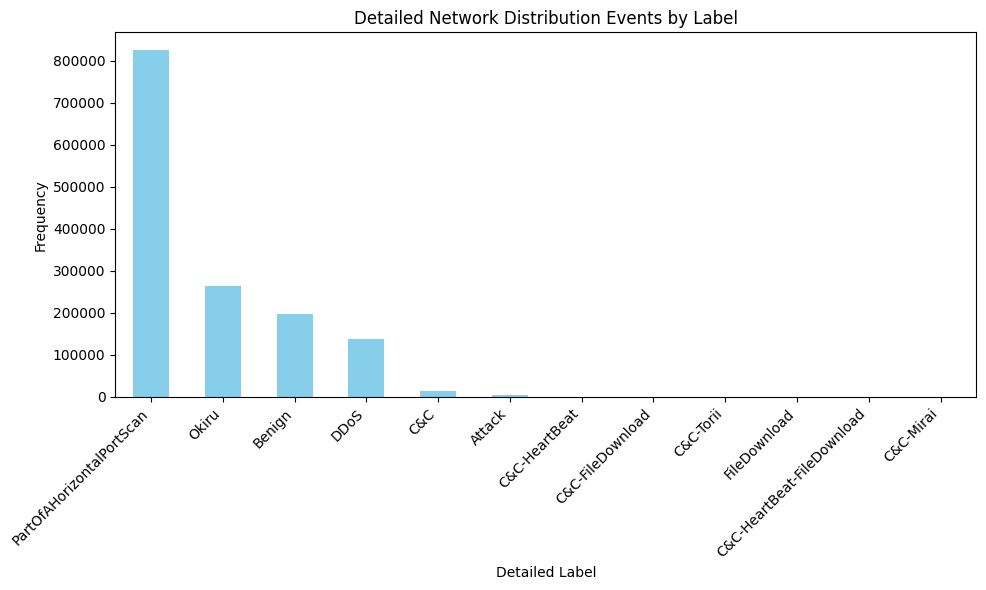

In [12]:
# Count the number of events for each label in detailed
event_label_counts = df['detailed_label'].value_counts()

# Visualization: Bar chart displaying the frequency of each network event type
plt.figure(figsize=(10, 6))
event_label_counts.plot(kind='bar', color='skyblue')
plt.title('Detailed Network Distribution Events by Label')
plt.xlabel('Detailed Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [13]:
# Initialize encoder with default parameters
target_le = LabelEncoder()

# Fit the encoder to the target attribute
encoded_attribute = target_le.fit_transform(df["label"])

# Replace target attribute with encoded values
df["label"] = encoded_attribute

# Check mapped labels
dict(zip(target_le.classes_, target_le.transform(target_le.classes_)))

{'Benign': 0, 'Malicious': 1}

In [14]:
# Initialize encoder with default parameters
target_le = LabelEncoder()

# Fit the encoder to the target attribute
encoded_attribute = target_le.fit_transform(df["detailed_label"])

# Replace target attribute with encoded values
df["detailed_label"] = encoded_attribute

# Check mapped labels
dict(zip(target_le.classes_, target_le.transform(target_le.classes_)))

{'Attack': 0,
 'Benign': 1,
 'C&C': 2,
 'C&C-FileDownload': 3,
 'C&C-HeartBeat': 4,
 'C&C-HeartBeat-FileDownload': 5,
 'C&C-Mirai': 6,
 'C&C-Torii': 7,
 'DDoS': 8,
 'FileDownload': 9,
 'Okiru': 10,
 'PartOfAHorizontalPortScan': 11}

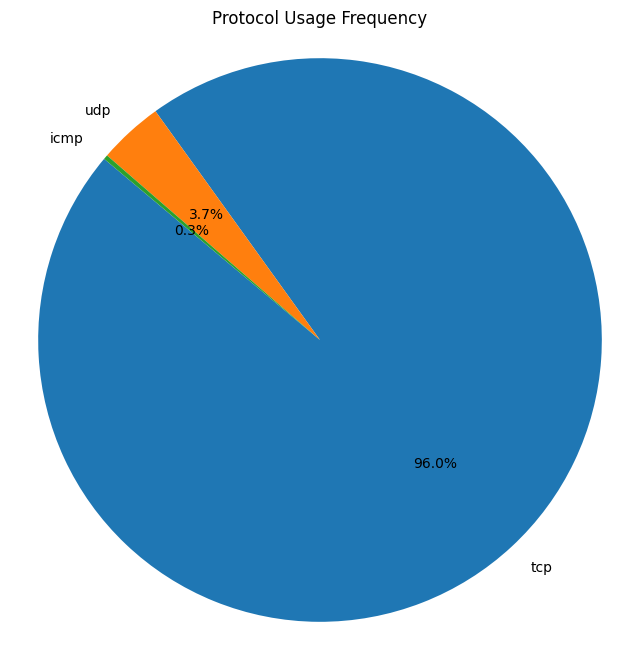

In [15]:
# Count the frequency of each network protocol
protocol_usage_counts = df['proto'].value_counts()

# Visualization: Pie chart showing the proportion of each protocol used
plt.figure(figsize=(8, 8))
plt.pie(protocol_usage_counts, labels=protocol_usage_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Protocol Usage Frequency')
plt.axis('equal')

plt.show()

In [16]:
# Use describe() method to obtain general statistics about the numerical features
numerical_features = ["duration", "orig_bytes",	"resp_bytes", "missed_bytes", "orig_pkts",	"orig_ip_bytes", "resp_pkts", "resp_ip_bytes"]
df[numerical_features].describe()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06
mean,6.911085e-01,2.725478e+03,2.132434e+01,2.109737e-01,1.780481e+02,7.745423e+03,1.269158e-01,3.006576e+01
std,8.568173e+01,1.714744e+06,9.746955e+03,4.366926e+01,7.230341e+04,2.849377e+06,1.548112e+01,1.017120e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
75%,2.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00
max,4.897682e+04,1.744830e+09,1.166102e+07,2.027200e+04,6.602735e+07,1.914793e+09,9.307000e+03,1.207699e+07


- As we can see from these statistics, the target attribute is highly imbalanced.
- We will maintain the original distribution for now until we explore the models' performance.

<Axes: ylabel='duration'>

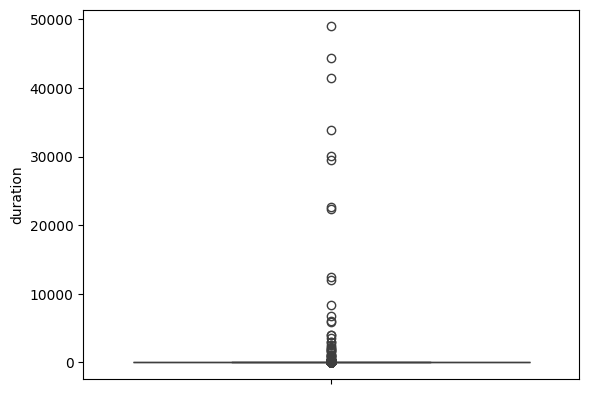

In [17]:
# Plot "duration" feature on a boxplot
sns.boxplot(data=df, y="duration")

In [18]:
# Replace outliers using IQR (Inter-quartile Range)
outliers_columns = ['duration']
for col_name in outliers_columns:
    # Calculate first and third quartiles
    q1, q3 = np.nanpercentile(df[col_name],[25,75])
    
    # Calculate the inter-quartile range
    intr_qr = q3-q1

    # Calculate lower and higher bounds
    iqr_min_val = q1-(1.5*intr_qr)
    iqr_max_val = q3+(1.5*intr_qr)
    print(f"(min,max) bounds for \"{col_name}\": ({iqr_min_val},{iqr_max_val})")

(min,max) bounds for "duration": (-3e-06,4.9999999999999996e-06)


In [19]:
# Reevaluate the new distribution of values
df["duration"].describe()

count    1.444706e+06
mean     6.911085e-01
std      8.568173e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e-06
max      4.897682e+04
Name: duration, dtype: float64

In [20]:
# Check updated statistics for numerical features
numerical_features = ["duration", "orig_bytes", "resp_bytes", "missed_bytes", "orig_pkts", "orig_ip_bytes",	"resp_pkts", "resp_ip_bytes"]
df[numerical_features].describe()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06
mean,6.911085e-01,2.725478e+03,2.132434e+01,2.109737e-01,1.780481e+02,7.745423e+03,1.269158e-01,3.006576e+01
std,8.568173e+01,1.714744e+06,9.746955e+03,4.366926e+01,7.230341e+04,2.849377e+06,1.548112e+01,1.017120e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
75%,2.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00
max,4.897682e+04,1.744830e+09,1.166102e+07,2.027200e+04,6.602735e+07,1.914793e+09,9.307000e+03,1.207699e+07


In [21]:
# Initialize and apply MinMaxScaler scaler
min_max_scaler = MinMaxScaler()
df[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])

In [22]:
# Check statistics for scaled features
df[numerical_features].describe()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06,1.444706e+06
mean,1.411093e-05,1.562030e-06,1.828686e-06,1.040715e-05,2.696581e-06,4.045044e-06,1.363659e-05,2.489508e-06
std,1.749434e-03,9.827569e-04,8.358582e-04,2.154166e-03,1.095052e-03,1.488086e-03,1.663384e-03,8.421971e-04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.514524e-08,2.088998e-08,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.514524e-08,2.088998e-08,0.000000e+00,0.000000e+00
75%,4.083565e-11,0.000000e+00,0.000000e+00,0.000000e+00,3.029048e-08,4.177997e-08,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [23]:
# Check connection duration by label'
connection_duration_by_label = df.groupby('detailed_label')['duration'].describe()
print("Summary Statistics of Connection Duration by Label:")
print(connection_duration_by_label)

Summary Statistics of Connection Duration by Label:
                   count          mean       std           min       25%  \
detailed_label                                                             
0                 3915.0  8.858027e-05  0.000120  2.755181e-07  0.000051   
1               197834.0  2.544356e-05  0.001383  0.000000e+00  0.000000   
2                15107.0  2.227872e-04  0.009656  0.000000e+00  0.000000   
3                   47.0  3.747967e-05  0.000023  1.225894e-05  0.000020   
4                  351.0  2.375150e-05  0.000028  0.000000e+00  0.000001   
5                   11.0  2.918258e-05  0.000010  1.749299e-05  0.000022   
6                    1.0  6.719077e-06       NaN  6.719077e-06  0.000007   
7                   30.0  1.167824e-01  0.273964  0.000000e+00  0.000000   
8               138775.0  5.235197e-06  0.000587  0.000000e+00  0.000000   
9                   17.0  1.165427e-04  0.000279  1.162644e-05  0.000028   
10              262687.0  2.110155e-

In [24]:
# Check the number of null values in each column
df.isnull().sum().sort_values(ascending=False)

proto             0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
missed_bytes      0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
label             0
detailed_label    0
dtype: int64

In [25]:
# Look for categorical features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444706 entries, 0 to 1444705
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   proto           1444706 non-null  object 
 1   duration        1444706 non-null  float64
 2   orig_bytes      1444706 non-null  float64
 3   resp_bytes      1444706 non-null  float64
 4   conn_state      1444706 non-null  object 
 5   missed_bytes    1444706 non-null  float64
 6   orig_pkts       1444706 non-null  float64
 7   orig_ip_bytes   1444706 non-null  float64
 8   resp_pkts       1444706 non-null  float64
 9   resp_ip_bytes   1444706 non-null  float64
 10  label           1444706 non-null  int64  
 11  detailed_label  1444706 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 143.3+ MB


In [26]:
# Check the number of unique values in each feature
categorical_features = ["proto","conn_state"]
for c in categorical_features:
    print(f"Column ({c}) has ({df[c].nunique()}) distinct values.")

Column (proto) has (3) distinct values.
Column (conn_state) has (13) distinct values.


In [27]:
# Initialize the encoder with its default parameters
ohe = OneHotEncoder()

# Fit the encoder to categorical features in the dataset
encoded_features = ohe.fit_transform(df[categorical_features])

# Create a dataframe of encoded features
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=ohe.get_feature_names_out())

# Check the results of encoding ('False': 0.0, 'True': 1.0}
encoded_features_df

,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1444702,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1444703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1444704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Merge encoded features with the dataset and drop original columns
df = pd.concat([df, encoded_features_df], axis=1).drop(categorical_features, axis=1)

In [29]:
# Check the final version of the dataset
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed_label,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,9.700507e-08,2.750984e-08,0.000004,0.0,1.514524e-08,3.969097e-08,0.000107,0.000006,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.213732e-03,1.361737e-06,0.000008,0.0,7.572619e-08,1.733869e-07,0.000215,0.000017,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.539977e-08,1.203555e-08,0.000000,0.0,4.543571e-08,9.870517e-08,0.000000,0.000000,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.506835e-08,1.203555e-08,0.000000,0.0,4.543571e-08,9.870517e-08,0.000000,0.000000,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000e+00,0.000000e+00,0.000000,0.0,1.514524e-08,3.029048e-08,0.000000,0.000000,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444701,0.000000e+00,0.000000e+00,0.000000,0.0,1.514524e-08,3.133498e-08,0.000000,0.000000,1,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1444702,6.124046e-05,0.000000e+00,0.000000,0.0,4.543571e-08,9.400493e-08,0.000000,0.000000,1,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1444703,0.000000e+00,0.000000e+00,0.000000,0.0,1.514524e-08,3.133498e-08,0.000000,0.000000,1,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1444704,6.120598e-05,0.000000e+00,0.000000,0.0,4.543571e-08,9.400493e-08,0.000000,0.000000,1,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Check not null values and attribute types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444706 entries, 0 to 1444705
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   duration           1444706 non-null  float64
 1   orig_bytes         1444706 non-null  float64
 2   resp_bytes         1444706 non-null  float64
 3   missed_bytes       1444706 non-null  float64
 4   orig_pkts          1444706 non-null  float64
 5   orig_ip_bytes      1444706 non-null  float64
 6   resp_pkts          1444706 non-null  float64
 7   resp_ip_bytes      1444706 non-null  float64
 8   label              1444706 non-null  int64  
 9   detailed_label     1444706 non-null  int64  
 10  proto_icmp         1444706 non-null  float64
 11  proto_tcp          1444706 non-null  float64
 12  proto_udp          1444706 non-null  float64
 13  conn_state_OTH     1444706 non-null  float64
 14  conn_state_REJ     1444706 non-null  float64
 15  conn_state_RSTO    1444706 non-null  

### 4. STORING PROCESSED DATASET

In [31]:
# Save a new csv file (updated/changed column names)
df.to_csv('../CSV-data/processed/iot23_combined_processed.csv')